## Importing Required Lib

In [71]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pred import prediction
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

## Prepairing Data

#### importing data

In [72]:
train_dir = '/media/hitesh_hdd/codes/data_science/projects/parking lot/train'

In [73]:
catagory = ['empty', 'not_empty']
train_data = []
train_label = []

In [74]:
def preprocessing (x, data, label):
    for cat_idx, cat in enumerate(catagory):
        for file in os.listdir(os.path.join(x, cat)):
            img_path = os.path.join(x, cat, file)
            img = imread(img_path)
            img = resize(img, (15,15))
            data.append(img.flatten())
            label.append(cat_idx)

In [75]:
preprocessing(train_dir, train_data, train_label)

In [76]:
train_data = np.asarray(train_data)
train_label = np.asarray(train_label)

## Data Split

In [77]:
X_train, X_valid, y_train, y_vaild = train_test_split(train_data, train_label, stratify=train_label, test_size=0.2)

## Classifier

In [78]:
model = SVC()

In [79]:
parameter = [{'gamma':[0.1, 0.01, 0.001, 0.0001], 'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(model, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001]}])

In [80]:
best_model = grid_search.best_estimator_

#### Testing Accuracy

In [81]:
y_prediction = best_model.predict(X_valid)

In [82]:
score = accuracy_score(y_prediction, y_vaild)

In [83]:
print(f"score of classifier is {score*100}%")

score of classifier is 100.0%


In [84]:
pickle.dump(best_model, open('./model.p', 'wb'))

## Use

#### Example 1

In [86]:
img_path = '/media/hitesh_hdd/codes/data_science/projects/parking lot/test/00000000_00000184.jpg'

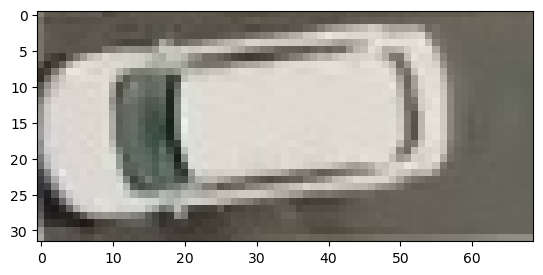

In [87]:
img = imread(img_path)
plt.imshow(img)
plt.show()

In [88]:
X = []
img = resize(img, (15, 15))
X.append(img.flatten())
X = np.asarray(X)

In [89]:
predict = best_model.predict(X)

In [90]:
prediction(predict)

Parking Lot is not empty


#### Example 2

In [91]:
img_path = '/media/hitesh_hdd/codes/data_science/projects/parking lot/test/00000020_00000147.jpg'

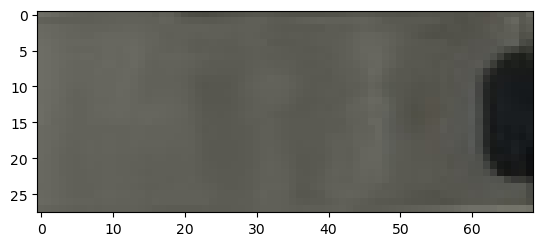

In [92]:
img = imread(img_path)
plt.imshow(img)
plt.show()

In [93]:
X = []
img = resize(img, (15, 15))
X.append(img.flatten())
X = np.asarray(X)

In [94]:
predict = best_model.predict(X)

In [95]:
prediction(predict)

Parking Lot is empty
